In [1]:
%matplotlib inline

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import skeletonize
from skimage import data
import sknw
import networkx as nx


In [19]:
# zig zag definitions
def drawline(p1,p2,image):
    p1 = tuple(p1.astype(int).tolist()) #input is numpyfloat array
    p2 = tuple(p2.astype(int).tolist()) # cv2.line needs tuple int inputs 
    color = (255, 255, 255) # color in BGR
    thickness = 1 # line thickness  

    #AND THEN FLIP THE  Y , X  FORMAT TO GRAPH IT CORRECTLY !!!!!! 
    start_point  = [p1[1],p1[0]]
    end_point = [p2[1],p2[0]]

    return(cv2.line(image, start_point, end_point, color, thickness))

def open_image(path):
    try: 
        image = cv2.imread(path, 0) # Reading an image in grayscale mode
        print("found image at : " , path)
    except:
        print("couldn't find image at : ", path)
    return(image)

def show_image(image):
    plt.imshow(image, cmap='gray') #map the image to black and white, white representing the line 
    plt.show()
    print("Plotted")

def zigzag(start_point,end_point,num_turns,zig_zag_size,image): #zigzagsize will scale the size of the zig zags
    
    #num turns must be greater than 2 
    slope_vector = np.array([  end_point[0]- start_point[0] , end_point[1] - start_point[1] ]) # vector representation of slope here in format [y , x]
    step_vector = slope_vector / (num_turns - 1) # partition total change inslope into steps to zig zag across and -1 because the number of turns will be one less than the number of partitions (also in format [y , x])
    normalized_step_vector = step_vector/np.linalg.norm(step_vector) # here we are getting the normalized step_vector so we can use its direction and ignore its magnitude 
    zig_zag_size_vector = normalized_step_vector * zig_zag_size

    for i in range(0,num_turns): 
        

        # ctrl / to toggle commented areas 
        # if i%2 ==0: # set zig and zag values (with alternating directions)
        #     zigzag = zig_zag_size_vector * np.array([1,-1])
        # else:
        #     zigzag =  zig_zag_size_vector * np.array([-1,1])

        if i%2 ==0: # set zig and zag values (with alternating directions)
            zigzag = [-zig_zag_size_vector[1], zig_zag_size_vector[0]]
        else:
            zigzag = [zig_zag_size_vector[1], -zig_zag_size_vector[0]]

        if i == 0: #if i is start point
            pt1 = start_point + step_vector*(i)
            pt2 = start_point + step_vector*(i+1) + zigzag
            try : image = drawline(pt1,pt2,image)
            except : print("error zigging")
            pt_old = pt2 #save endpoint
        elif i == num_turns-1: #elif i+1 is FINAL endpoint
            pt1 = pt_old
            pt2 = start_point + step_vector*(i) 
            try : image = drawline(pt1,pt2,image)
            except : print("error zagging")
        else: #otherwise in the middle 
            pt1 = pt_old
            pt2 = start_point + step_vector*(i+1) +zigzag
            try : image = drawline(pt1,pt2,image)
            except : print("error zig-zagging")
            pt_old =pt2 #save endpoint for next start  
    #image = drawline(start_point,end_point,image) #this is just for error checking, draw a line between start and end points 
    #show_image(image)
    return(image)

In [20]:
#skeleton to graph definition

def skeleton_to_graph(path):
    try: img = cv2.imread(cv2.samples.findFile(path),0) # get img
    except : print("can't find that image at", path)
    img = img > 127 #make bool 
    ske = skeletonize(~img).astype(np.uint16) # use sknw skeletonize 
    graph = sknw.build_sknw(ske) # build graph from skeleton
    print("\nskeleton converted to graph\n")
    return graph



# start HERE : to do : 

# first:fix the zig zag function as its not ziggin and zaggin right 

# then: iterate over the whole damn image

# then make it so that it prints to a seperate image 

# then convert to coordinates for gps

# then vroom 


skeleton converted to graph

found image at :  ../Lake_Murray_Map_Skeletons/SE_corner_thinned.png
zig zaggin on : 


1 10 


{'pts': array([[ 1, 41],
       [ 0, 40],
       [ 0, 39],
       [ 0, 38],
       [ 1, 37],
       [ 2, 36],
       [ 3, 35],
       [ 4, 34],
       [ 5, 33],
       [ 6, 32]], dtype=int16), 'weight': 11.899494936611667}
zig zaggin on : 


4 5 


{'pts': array([[ 3, 78],
       [ 2, 79],
       [ 1, 80],
       [ 1, 81],
       [ 1, 82],
       [ 1, 83],
       [ 1, 84],
       [ 1, 85],
       [ 1, 86],
       [ 2, 87],
       [ 3, 88]], dtype=int16), 'weight': 11.656854249492381}
zig zaggin on : 


7 16 


{'pts': array([[ 5, 47],
       [ 5, 48],
       [ 5, 49],
       [ 5, 50],
       [ 5, 51],
       [ 5, 52],
       [ 5, 53],
       [ 5, 54],
       [ 6, 55],
       [ 7, 56],
       [ 8, 57]], dtype=int16), 'weight': 11.242640687119287}
zig zaggin on : 


8 16 


{'pts': array([[ 5, 68],
       [ 5, 67],
       [ 5, 66],
       [ 5, 65],
       [ 5, 64]

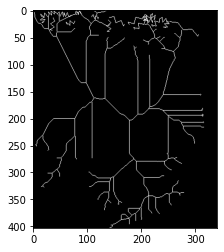

Plotted


True

In [21]:

path = r'../Lake_Murray_Map_Skeletons/SE_corner_thinned.png' 
graph = skeleton_to_graph(path)

nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes]) # extract coodinates for each node 
# ps[0,1], ps[0,0] = x , y coordinates for node 0  


#def get_node_endpoints_for_edges()
# draw edges by pts
image = open_image(path) #start by opening the image, choose image in the function 
i = 0
for (s,e) in graph.edges():
    
    if graph[s][e]['weight'] > 10:
        print("zig zaggin on : \n\n")
        print(s,e, "\n\n")
        print(graph[s][e])
        start_point = np.array([ ps[s,0] , ps[s,1] ]) #list[] vs tuple() coordinates y , x 
        end_point = np.array([  ps[e,0] , ps[e,1]  ])

        
        image = zigzag(start_point,end_point,5,4,image)


    i = i +1
    if i > 100 :
        break

show_image(image)

cv2.imwrite('zigzag_full.png', image )



# nodes = graph.nodes()
# #ps = np.array([nodes[i]['o'] for i in nodes])
# for i in nodes :
#     print(nodes[i])
#     break



# get a list of all the start and endpoint coordinates 

found image at :  ../Lake_Murray_Map_Skeletons/SE_corner_thinned.png


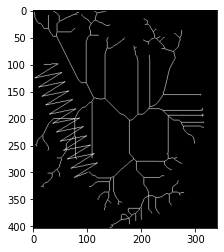

Plotted


True

In [22]:
#note that 0,0 is top left corner and 225,225 is bottom right
start_point = np.array([ 100 , 20]) #list[] vs tuple() coordinates in y , x form 
end_point = np.array([300,100])

        #fun fact r represents raw string so that backslashes are left in
path = r'../Lake_Murray_Map_Skeletons/SE_corner_thinned.png' 
image = open_image(path) #start by opening the image, choose image in the function 


image = zigzag(start_point,end_point,25,25,image)

show_image(image)
cv2.imwrite('zigzag_test.png', image )

